# **Pendahuluan**

PT Home Credit Indonesia merupakan perusahaan pembiayaan berbasis teknologi dengan jangkauan mitra toko yang luas di lebih dari 200 kota di Indonesia. Telah beroperasi sejak 2013, Home Credit kini berkembang menjadi mitra finansial terpercaya bagi jutaan pelanggan kami. Kami turut mendorong keterbukaan akses terhadap layanan keuangan yang transparan dengan proses cepat dan mampu membantu masyarakat dalam memenuhi kebutuhan mereka secara terencana termasuk mengelola keuangan dan cicilan mereka dengan baik.

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Dengan memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivasi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang akan dikerjakan. Untuk lebih lanjut, berikut akan disajikan tahapan analisa datanya.

#**Import Library**

Hal yang pertama dilakukan mengimport library

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#SKLearn Libraries
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.pipeline import Pipeline
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, accuracy_score


#Google Drive Mount
drive.mount('/content/drive')

Mounted at /content/drive


#**Load Dataset**

Dataset yang ingin akan digunakan yaitu application_train dan application_test. Berikut load datasetnya.

In [2]:
appl_train = pd.read_csv('/content/drive/MyDrive/Project/Bootcamp/Rakamin/VIX Home Credit Indonesia/Final Project/dataset/application_train.csv')
appl_test = pd.read_csv('/content/drive/MyDrive/Project/Bootcamp/Rakamin/VIX Home Credit Indonesia/Final Project/dataset/application_test.csv')
print('appl_train mempunyai baris = {}'.format(appl_train.shape[0]), 'dan kolom = {}'.format(appl_train.shape[1]))
print('appl_test mempunyai baris = {}'.format(appl_test.shape[0]), 'dan kolom = {}'.format(appl_test.shape[1]))

appl_train mempunyai baris = 307511 dan kolom = 122
appl_test mempunyai baris = 48744 dan kolom = 121


Setelah load dataset, selanjutnya adalah melakukan Exploratory Data Analysis.

#**Exploratory Data Analysis (EDA)**

Tahapan di bawah ini untuk mengeksplor dataset yang sudah diload

## Melihat Dataset application_train

Untuk melakukan EDA, hal yang pertama dilakukan adalah melihat dataset pada head()

In [3]:
appl_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Karena banyaknya kolom pada appl_train, maka akan pembagian kolom yang dijumlahkan berdasarkan tipe data.

In [4]:
appl_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Untuk mencari kolom yang mengandung objek, maka digunakan filter tipe data object dan dijabarkan apa saja yang ada di kolom tersebut.

In [5]:
appl_train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Setelah melihat tipe data objek, selanjutnya adalah membagi tipe data objek dan numerikal dengan value kategorikal dan numerikal untuk melihat statisic summary.

In [6]:
cats = appl_train.select_dtypes(include='object').columns.tolist()
nums = appl_train.select_dtypes(exclude='object').columns.tolist()

## Melihat Dataset application_test

In [7]:
appl_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cats = appl_test.select_dtypes(include='object').columns.tolist()
nums = appl_test.select_dtypes(exclude='object').columns.tolist()

Sama seperti appl_train, bedanya hanya pada appl_train terdapat TARGET, sedangkan appl_test tidak. Namun appl_test nantinya akan digunakan untuk tes machine learning

## Statistic Summary


Mendeskripsikan ringkasan statistik berdasarkan kolom yang sudah dibagi pada kategorikal dan numerikal.

In [9]:
appl_train[cats].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


Hasil ringkasan untuk kategorikal tidak ada masalah.

In [10]:
appl_train[nums].describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
appl_test[nums].describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


Terlihat kejanggalan pada statistik DAYS_BIRTH dan DAYS_EMPLOYED karena mempunyai nilai minus. Untuk mengatasinya akan dicek anomali data tersebut di bawah ini.

## Anomali Data pada DAYS_BIRTH & DAYS_EMPLOYED

Pada kolom DAYS_BIRTH dan DAYS_EMPLOYED mempunyai value minus. Tidak hanya pada appl_train, namun appl_test juga sama. Untuk mengatasinya, pertama-tama adalah menghitung DAYS_BIRTH / -365 (karena mengacu 1 tahun 365 hari, dan minus digunakan agar value DAYS_BIRTH tidak lagi minus).

In [12]:
appl_train['DAYS_BIRTH'] = appl_train['DAYS_BIRTH'] / -365
appl_test['DAYS_BIRTH'] = appl_test['DAYS_BIRTH'] / -365
print('Perubahan DAYS_BIRTH pada appl_train')
print(appl_train['DAYS_BIRTH'].describe())
print('=' * 50)
print('perubahan DAYS_BIRTH pada appl_test')
print(appl_test['DAYS_BIRTH'].describe())

Perubahan DAYS_BIRTH pada appl_train
count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64
perubahan DAYS_BIRTH pada appl_test
count    48744.000000
mean        44.022150
std         11.851782
min         20.104110
25%         34.235616
50%         43.246575
75%         53.800000
max         69.027397
Name: DAYS_BIRTH, dtype: float64


DAYS_BIRTH mengacu pada usia, jadi sudah terlihat tidak aneh lagi. Selanjutnya adalah melihat DAYS_EMPLOYED

In [13]:
anom_data = appl_train[appl_train['DAYS_EMPLOYED'] == 365243]
non_anom_data = appl_train[appl_train['DAYS_EMPLOYED'] != 365243]

print('Data yang anomali adalah sebesar %0.2f%%' % (100 * anom_data['TARGET'].mean()))
print('Data yang bukan anomali adalah sebesar %0.2f%%' % (100 * non_anom_data['TARGET'].mean()))
print('Data yang anomali pada DAYS_EMPLOYED adalah %d' % len(anom_data))

Data yang anomali adalah sebesar 5.40%
Data yang bukan anomali adalah sebesar 8.66%
Data yang anomali pada DAYS_EMPLOYED adalah 55374


In [14]:
appl_train['DAYS_EMPLOYED_ANOM'] = appl_train["DAYS_EMPLOYED"] == 365243
appl_test['DAYS_EMPLOYED_ANOM'] = appl_test["DAYS_EMPLOYED"] == 365243

appl_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
appl_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)


print('Pada data train terdapat anomali pada DAYS_EMPLOYED sebesar', appl_train['DAYS_EMPLOYED_ANOM'].sum(), 'dari jumlah data sebesar', len(appl_train))
print('Pada data test terdapat anomali pada DAYS_EMPLOYED sebesar', appl_test['DAYS_EMPLOYED_ANOM'].sum(), 'dari jumlah data sebesar', len(appl_test))

Pada data train terdapat anomali pada DAYS_EMPLOYED sebesar 55374 dari jumlah data sebesar 307511
Pada data test terdapat anomali pada DAYS_EMPLOYED sebesar 9274 dari jumlah data sebesar 48744


## Korelasi

Untuk memudahkan mencari korelasi pada set appl_train, menggunakan korelasi dari TARGET dengan mengurutkan korelasi dari yang minus 1 hingga positif 1, karena banyaknya kolom tidak memungkinkan untuk menampilkan heatmap. Dan didapatkan korelasi di bawah ini.

In [15]:
appl_train.corr()['TARGET'].sort_values()

<ipython-input-15-21c027e8d0eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  appl_train.corr()['TARGET'].sort_values()


EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED_ANOM            -0.045987
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, Length: 107, dtype: float64

Sehubungan dengan anomali data DAYS_BIRTH yang sudah dieksekusi, maka korelasinya menjadi negatif. Namun, tidak memungkiri bahwa DAYS_BIRTH yang belum dieksekusi pun mempunyai nilai korelasi tinggi setelah target. Oleh karena itu, kita akan memfilter korelasi dari sekian banyak menjadi 5 saja, yaitu TARGET, DAYS_BIRTH, EXT_SOURCE_1, EXT_SOURCE_2, dan EXT_SOURCE_3.

In [16]:
five_corr = appl_train[['TARGET', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
five_corr = five_corr.corr()
five_corr

,TARGET,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.078239,-0.155317,-0.160472,-0.178919
DAYS_BIRTH,-0.078239,1.000000,0.600610,0.091996,0.205478
EXT_SOURCE_1,-0.155317,0.600610,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.091996,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.205478,0.186846,0.109167,1.000000


Text(0.5, 1.0, 'Korelasi Heatmap')

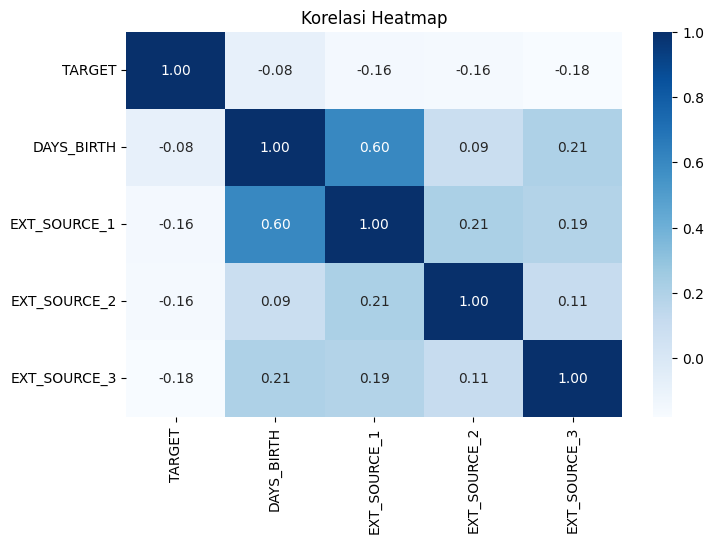

In [17]:
plt.figure(figsize=(8, 5))
sns.heatmap(five_corr, cmap='Blues', annot=True, fmt='.2f')
plt.title('Korelasi Heatmap')

## Distribusi TARGET berdasarkan korelasi Heatmap

In [18]:
appl_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

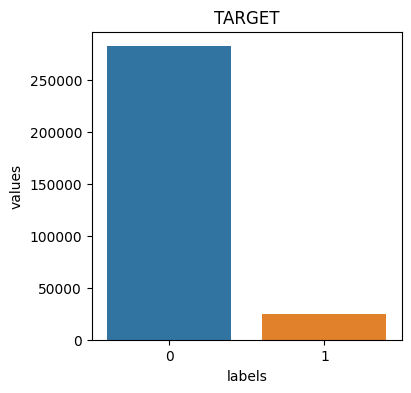

In [19]:
target = appl_train['TARGET'].value_counts()
df = pd.DataFrame({'labels': target.index, 'values': target.values})

plt.figure(figsize=(4,4))
plt.title("TARGET")

sns.barplot(x = 'labels', y='values', data=df)
locs, labels = plt.xticks()
plt.show()

TARGET pada appl_train mempunyai value sebagai berikut :

- Value 0 diartikan sebagai klien yang sanggup membayar pinjaman

- Value 1 diartikan sebagai klien yang mempunyai kendala pembayaran

Berikut distribusi TARGET berdasarkan korelasi Heatmap yang sudah dicari sebelumnya

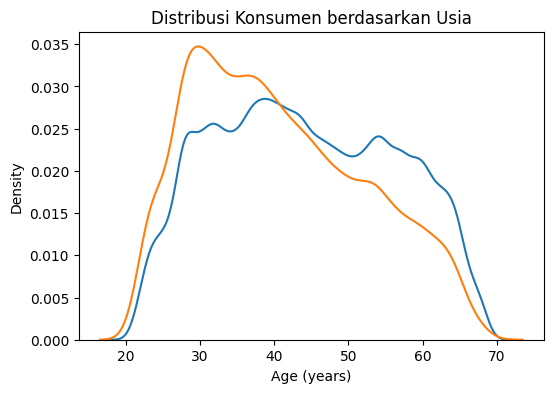

In [20]:
plt.figure(figsize = (6, 4))

sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 0, 'DAYS_BIRTH'], label = 'target == 0')
sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 1, 'DAYS_BIRTH'], label = 'target == 1')


plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribusi Konsumen berdasarkan Usia');

Bisa dilihat bahwa konsumen yang mengajukan pinjaman rentang usia 20 hingga 70 tahun dengan konsumen terbanyak di rentang usia 20-40 tahun. Selain itu, konsumen dengan rentang usia hingga 30 tahun mengalami kendala pembayaran.

Text(0.5, 1.0, 'Distribusi EXT_SOURCE_1')

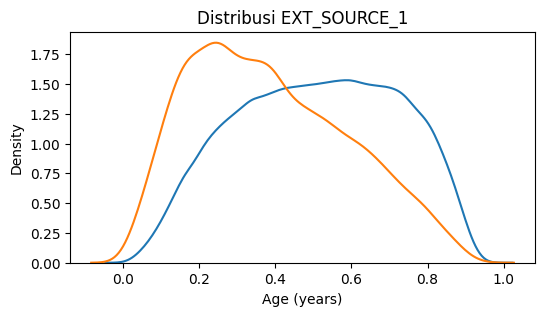

In [21]:
plt.figure(figsize = (6, 3))

sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 0, 'EXT_SOURCE_1'], label = 'target == 0')
sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 1, 'EXT_SOURCE_1'], label = 'target == 1')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribusi EXT_SOURCE_1')

Text(0.5, 1.0, 'Distribusi EXT_SOURCE_2')

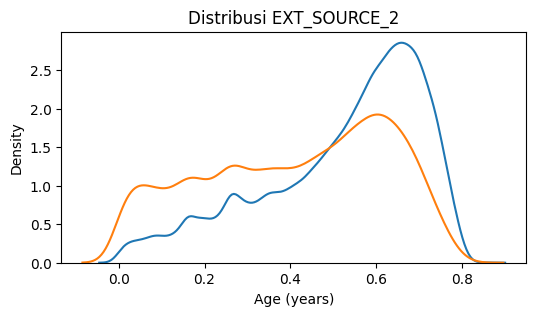

In [22]:
plt.figure(figsize = (6, 3))

sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 0, 'EXT_SOURCE_2'], label = 'target == 0')
sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'target == 1')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribusi EXT_SOURCE_2')

Text(0.5, 1.0, 'Distribusi EXT_SOURCE_3')

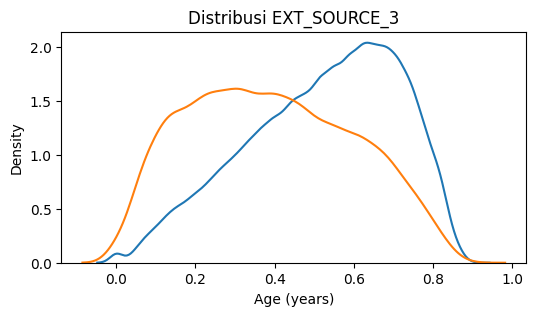

In [23]:
plt.figure(figsize = (6, 3))

sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 0, 'EXT_SOURCE_3'], label = 'target == 0')
sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 1, 'EXT_SOURCE_3'], label = 'target == 1')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribusi EXT_SOURCE_3')

## Distribusi TARGET lainnya

Selanjutnya Distribusi TARGET dari berbagai aspek yang terdapat dari kolom. Untuk memahaminya, TARGET pada appl_train mempunyai value sebagai berikut :

- Value 0 diartikan sebagai klien yang sanggup membayar pinjaman

- Value 1 diartikan sebagai klien yang mempunyai kendala pembayaran

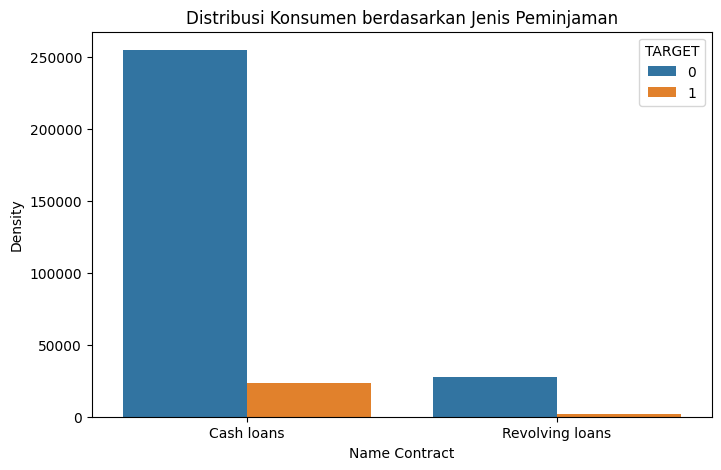

In [24]:
plt.figure(figsize = (8,5))

sns.countplot(appl_train, x='NAME_CONTRACT_TYPE', hue='TARGET')

plt.xlabel('Name Contract'); plt.ylabel('Density'); plt.title('Distribusi Konsumen berdasarkan Jenis Peminjaman');

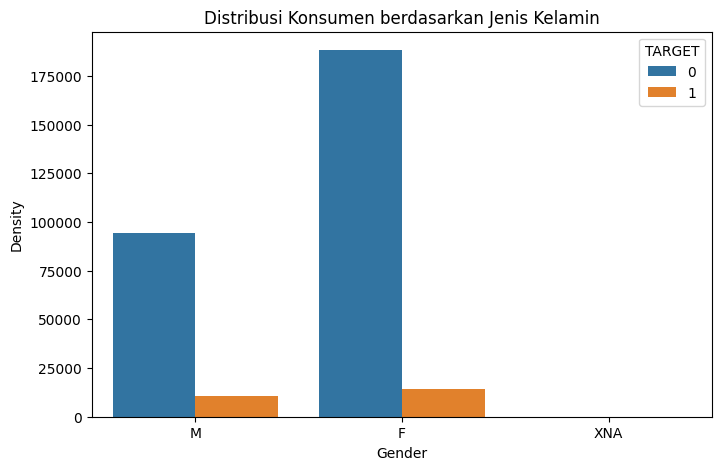

In [25]:
plt.figure(figsize = (8,5))

sns.countplot(appl_train, x='CODE_GENDER', hue='TARGET')

plt.xlabel('Gender'); plt.ylabel('Density'); plt.title('Distribusi Konsumen berdasarkan Jenis Kelamin');

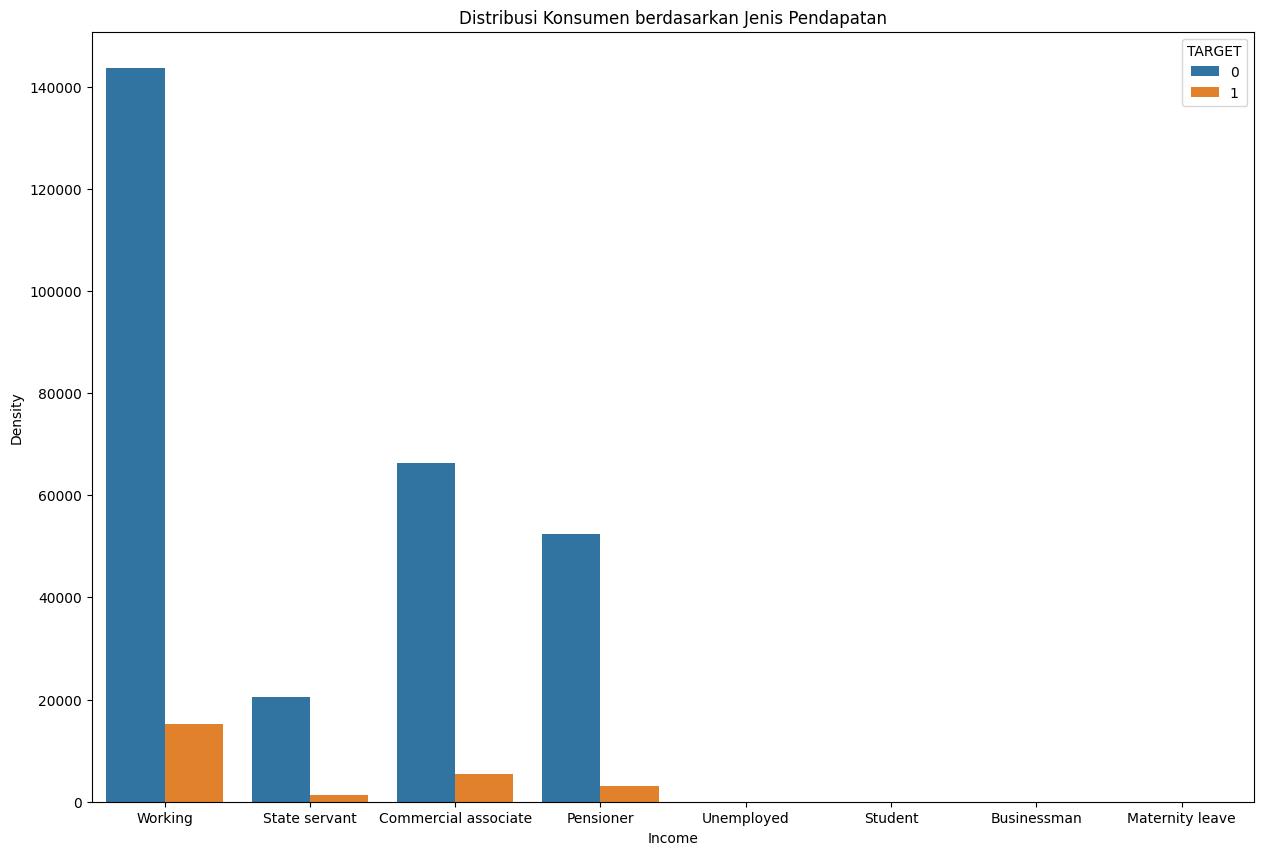

In [26]:
plt.figure(figsize = (15,10))

sns.countplot(appl_train, x='NAME_INCOME_TYPE', hue='TARGET')

plt.xlabel('Income'); plt.ylabel('Density'); plt.title('Distribusi Konsumen berdasarkan Jenis Pendapatan');

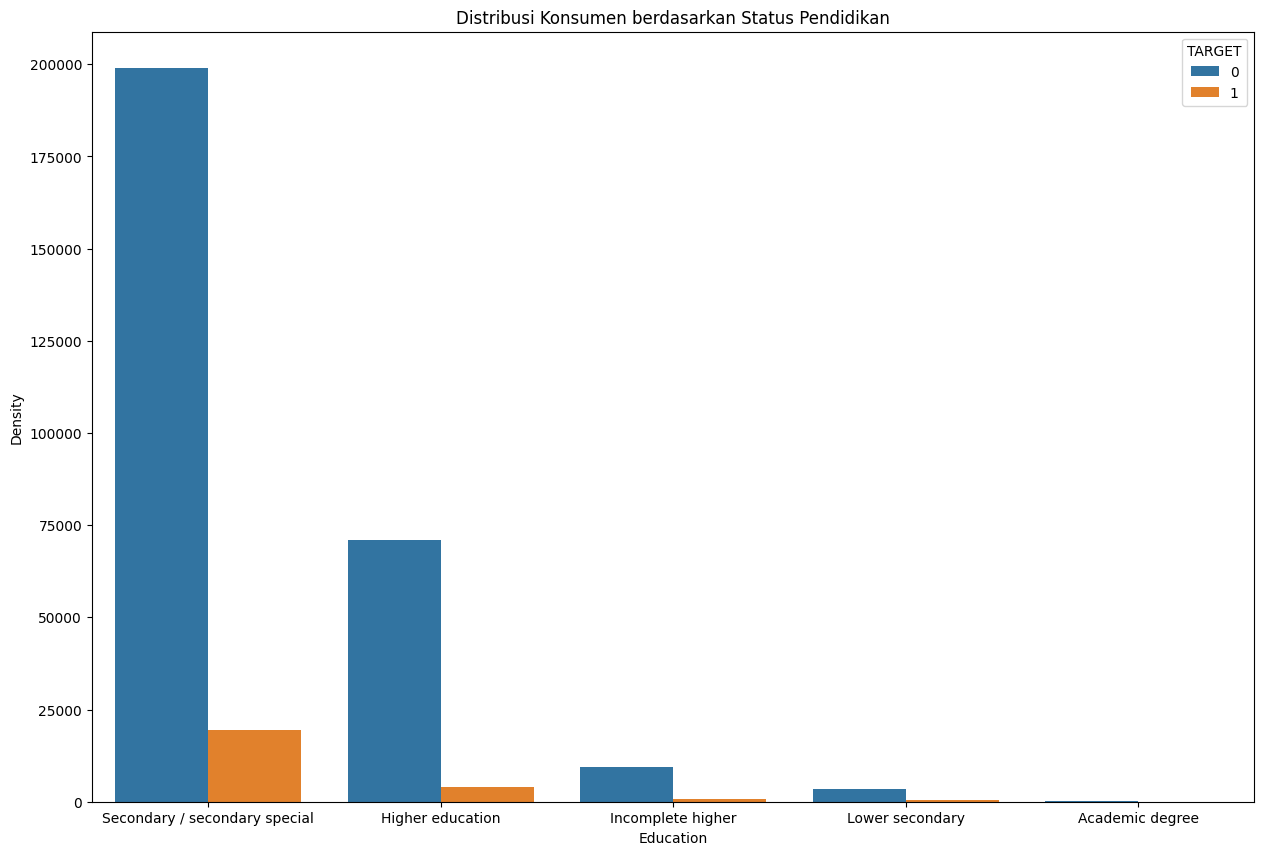

In [27]:
plt.figure(figsize = (15,10))

sns.countplot(appl_train, x='NAME_EDUCATION_TYPE', hue='TARGET')

plt.xlabel('Education'); plt.ylabel('Density'); plt.title('Distribusi Konsumen berdasarkan Status Pendidikan');

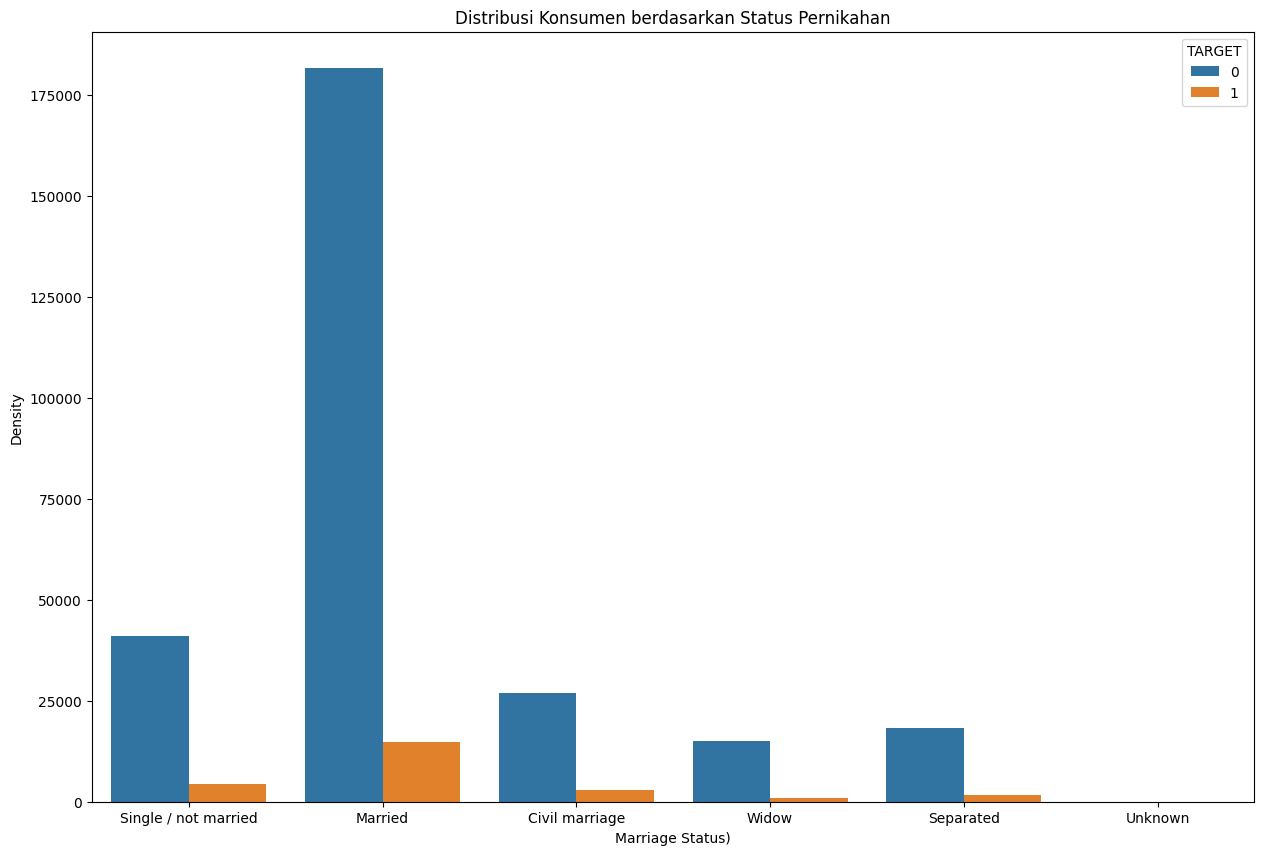

In [28]:
plt.figure(figsize = (15,10))

sns.countplot(appl_train, x='NAME_FAMILY_STATUS', hue='TARGET')

plt.xlabel('Marriage Status)'); plt.ylabel('Density'); plt.title('Distribusi Konsumen berdasarkan Status Pernikahan');

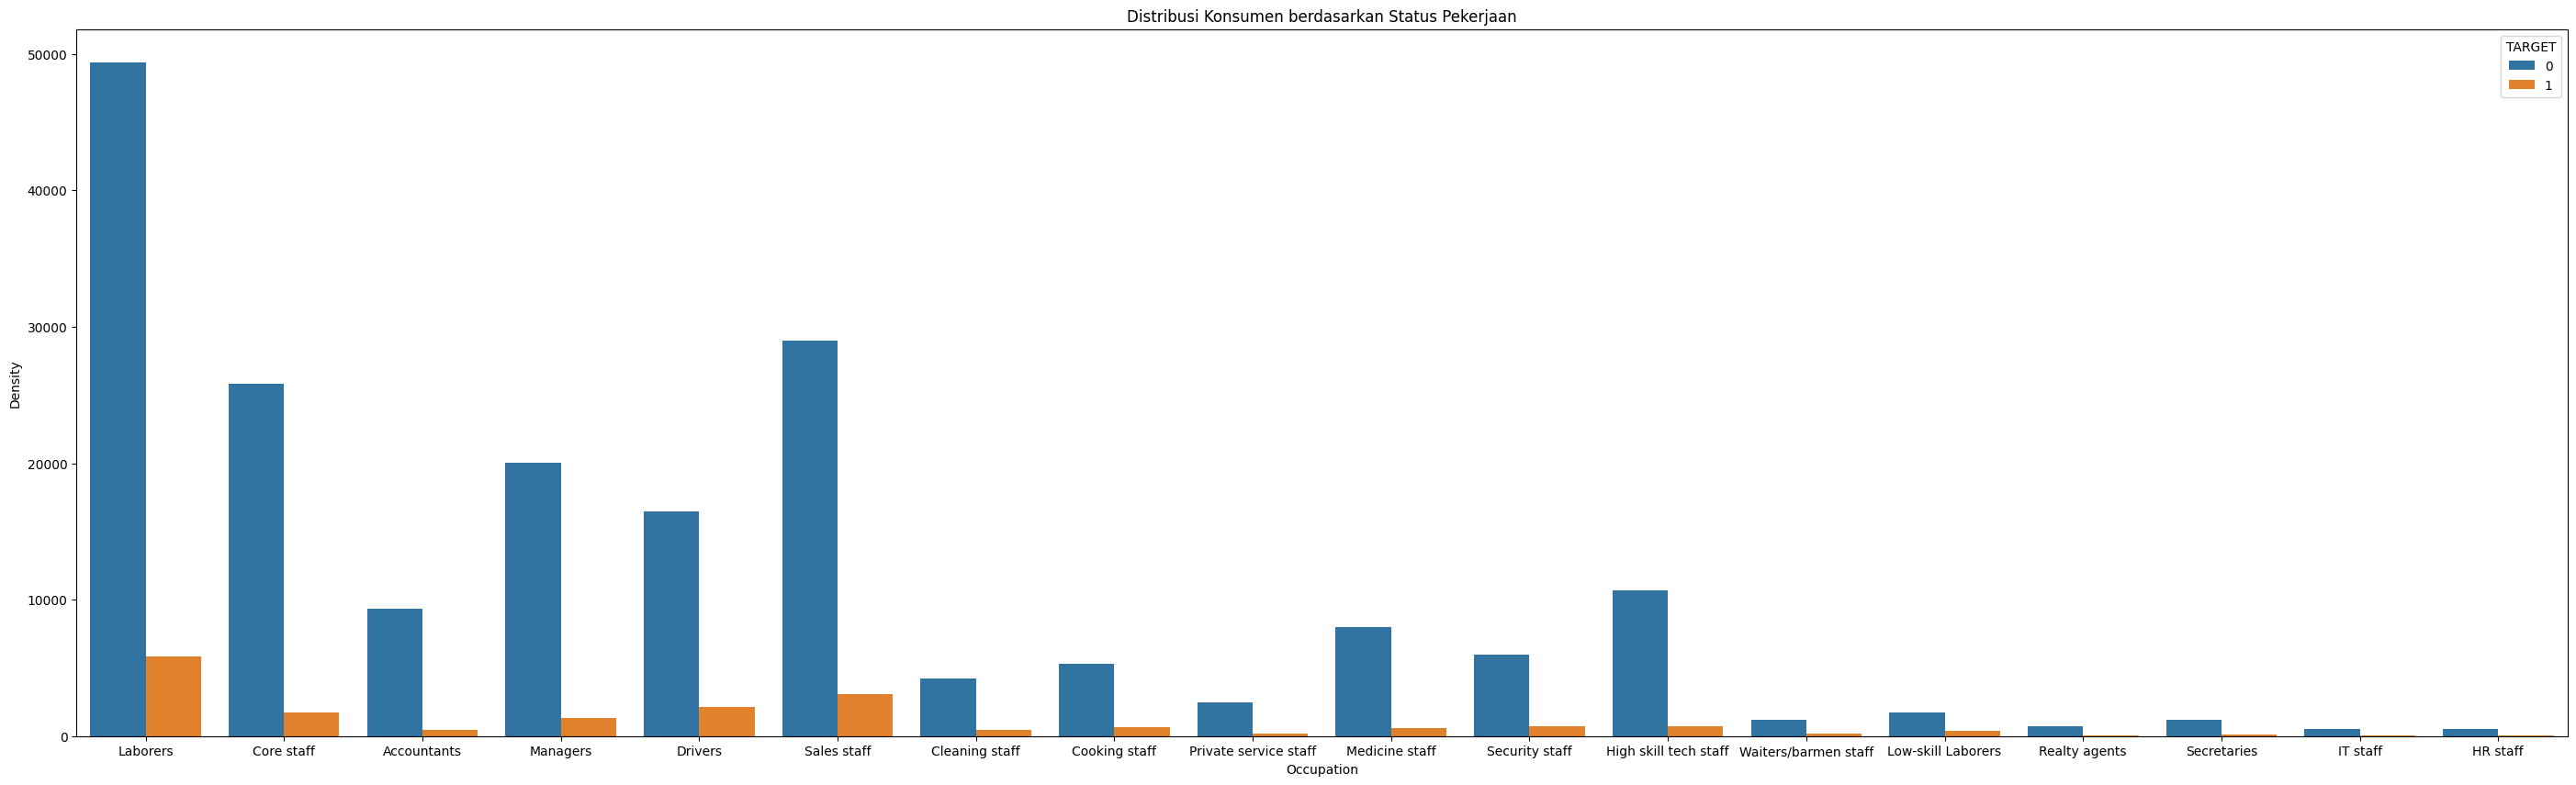

In [29]:
plt.figure(figsize = (35,10))

sns.countplot(appl_train, x='OCCUPATION_TYPE', hue='TARGET')

plt.xlabel('Occupation'); plt.ylabel('Density'); plt.title('Distribusi Konsumen berdasarkan Status Pekerjaan');

## Melihat isi dari setiap kolom yang ada

Untuk melihat isi dari setiap kolom selain dari distribusi sebelumnya, berikut akan dijabarkan isi daripada kolom appl_train

In [30]:
for col in cats:
  print('-----'*10)
  print(f'Values of column {col}:')
  print(appl_train[col].value_counts())

--------------------------------------------------
Values of column NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------
Values of column CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
--------------------------------------------------
Values of column FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
--------------------------------------------------
Values of column FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
--------------------------------------------------
Values of column NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
--------------------------------------------------
Values of column NAME_INCOME

# **Data Preprocessing**

Setelah melakukan EDA, tahap selanjutnya adalah preprocessing yaitu berupa mencari data duplikat, data missing, membuat label encoder beserta one hot encoder, dan membuat dataset appl_train dan appl_test identik sama. Berikut akan ditelusuri.

## Mencari Duplicated Value

In [31]:
print('appl_train mempunyai nilai duplikat sebanyak', appl_train.duplicated().sum())
print('appl_test mempunyai nilai duplikat sebanyak', appl_test.duplicated().sum())

appl_train mempunyai nilai duplikat sebanyak 0
appl_test mempunyai nilai duplikat sebanyak 0


Karena tidak ada data duplikat, selanjutnya mencari missing value

## Mencari Missing Value

Untuk mencari null value pada dataset, menggunakan sum setiap kolom dan diurutkan berdasarkan yang terbanyak. Hasilnya adalah seberapa banyak data yang null dan persentasenya.

In [32]:
null_value_total = appl_train.isnull().sum().sort_values(ascending=False)
null_value_persen = (appl_train.isnull().sum()/appl_train.isnull().count()*100).sort_values(ascending=False)
null_value_appl_train = pd.concat([null_value_total, null_value_persen], axis=1, keys=['Total Null Value', 'Persentase'])
null_value_appl_train.head(20)

,Total Null Value,Persentase
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


Karena banyaknya null value, sebaiknya dibiarkan saja agar proses untuk machine learningnya tidak mengalami kendala. Untuk kode di bawah ini tidak dijalankan karena akan menghilangkan null value > 60%.

In [33]:
#null_percent = (appl_train.isnull().sum() / len(appl_train)) * 100
#percent = 60
#columns_drop = null_percent[null_percent > percent].index

#rint('Menghapus kolom dengan null values > 60%')
#print(columns_drop.sort_values())

#appl_train = appl_train.drop(columns_drop, axis = 1)

#print('=' * 80)

#print('Jumlah dtypes appl_train terbaru adalah')
#print(appl_train.dtypes.value_counts())

Selanjutnya adalah membuat label encoder

## Membuat label encoder

Karena Machine Learning tidak bisa membaca selain numerikal, maka dibuatkan label encoder. Karena pada dataset appl_train mempunyai kategorikal, maka harus diubah menjadi numerikal dengan label encoder dan hasilnya ada 3 kolom kategorikal yang diubah menjadi numerikal.

In [34]:
label_encoder = LabelEncoder()
label_count = 0

for col in appl_train:
    if appl_train[col].dtype == 'object':
        if len(list(appl_train[col].unique())) <= 2:
            label_encoder.fit(appl_train[col])
            appl_train[col] = label_encoder.transform(appl_train[col])
            appl_test[col] = label_encoder.transform(appl_test[col])
            label_count += 1

print('label encoder terdiri dari %d kolom.' % label_count)

label encoder terdiri dari 3 kolom.


Namun karena tidak semua kolom kategorikal yang diubah menggunakan label encoder, maka langkah yang efektif untuk semua kolom diubah menjadi numerikal dengan menggunakan One Hot Encoder

## One Hot Encoder

Karena kedua dataset masih memiliki beberapa kategorikal, untuk mengubah semuanya dengan metode One Hot Encoder dan dengan cara menggunakan pandas get_dummies dan setelah diekstrak menjadi informasi baris dan kolom di atas. Metode ini digunakan untuk kedepannya menganalisa melalui machine learning.

In [35]:
appl_train_dummy = pd.get_dummies(appl_train)
appl_test_dummy = pd.get_dummies(appl_test)

print('appl_train setelah menggunakan encoder mempunyai baris = {}'.format(appl_train_dummy.shape[0]), 'dan kolom = {}'.format(appl_train_dummy.shape[1]))
print('appl_test setelah menggunakan encoder mempunyai baris = {}'.format(appl_test_dummy.shape[0]), 'dan kolom = {}'.format(appl_test_dummy.shape[1]))

appl_train setelah menggunakan encoder mempunyai baris = 307511 dan kolom = 244
appl_test setelah menggunakan encoder mempunyai baris = 48744 dan kolom = 240


## Membuat dataset appl_train dan appl_test identik sama

appl_train dan appl_test nantinya akan diuji memprediksi regresi logistik menggunakan machine learning. Kedua dataset hampir identik satu sama lain, namun karena kolom pada appl_train lebih banyak 4 kolom, disini akan digabungkan kedua dataset dan setelah itu nantinya dipisah kembali. Khusus untuk appl_train mempunyai kolom TARGET. Berikut hasil yang didapat

In [36]:
appl_train_dummy_label = appl_train_dummy['TARGET']
appl_train_dummy, appl_test_dummy = appl_train_dummy.align(appl_test_dummy, join='inner', axis=1)

appl_train_dummy['TARGET'] = appl_train_dummy_label
print('appl_train setelah diidentifikasi kolom yang sama adalah dengan mempunyai baris = {}'.format(appl_train_dummy.shape[0]), 'dan kolom = {}'.format(appl_train_dummy.shape[1]))
print('appl_test setelah diidentifikasi kolom yang sama adalah dengan mempunyai baris = {}'.format(appl_test_dummy.shape[0]), 'dan kolom = {}'.format(appl_test_dummy.shape[1]))

appl_train setelah diidentifikasi kolom yang sama adalah dengan mempunyai baris = 307511 dan kolom = 241
appl_test setelah diidentifikasi kolom yang sama adalah dengan mempunyai baris = 48744 dan kolom = 240


Setelah mengidentifikasikan kedua datasetnya sama, selanjutnya adalah melakukan polynomial feature.

## Polynomial Feature

Selanjutnya akan melakukan polynomial feature yang berfokus pada EXT_SOURCE dari appl_train dan appl_test. Disini menggunakan metode imputer untuk mengisi null value agar bisa dianalisis lebih dalam.

In [37]:
poly_feat = appl_train_dummy[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_feat_test = appl_test_dummy[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_feat['TARGET']
poly_features = poly_feat.drop(columns=['TARGET'])
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_feat_test)

In [38]:
poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(poly_features)

PolynomialFeatures(degree=3)

In [39]:
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Feature memiliki baris', poly_features.shape[0], 'dan kolom', poly_features.shape[1])
print('Polynomial Feature memiliki baris', poly_features_test.shape[0], 'dan kolom', poly_features_test.shape[1])

Polynomial Feature memiliki baris 307511 dan kolom 35
Polynomial Feature memiliki baris 48744 dan kolom 35


In [40]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2', 'EXT_SOURCE_1^3',
       'EXT_SOURCE_1^2 EXT_SOURCE_2', 'EXT_SOURCE_1^2 EXT_SOURCE_3',
       'EXT_SOURCE_1^2 DAYS_BIRTH', 'EXT_SOURCE_1 EXT_SOURCE_2^2',
       'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
       'EXT_SOURCE_1 EXT_SOURCE_3^2',
       'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_1 DAYS_BIRTH^2', 'EXT_SOURCE_2^3',
       'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2^2 DAYS_BIRTH',
       'EXT_SOURCE_2 EXT_SOURCE_3^2',
       'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_2 DAYS_BIRTH^2', 'EXT_SOURCE_3^3',
       'EXT_SOURCE_3^2 DAYS_BIRTH', 'EXT_SOURCE_3 DAYS_BIR

In [41]:
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target
poly_corr = poly_features.corr()['TARGET'].sort_values()

In [42]:
poly_corr.sort_values()

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.155891
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH     -0.151816
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
EXT_SOURCE_3 DAYS_BIRTH                  -0.150109
EXT_SOURCE_2^2                           -0.149512
EXT_SOURCE_2^2 DAYS_BIRTH                -0.149313
EXT_SOURCE_3^2 DAYS_BIRTH                -0.141777
EXT_SOURCE_3^2                           -0.141662
EXT_SOURCE_2^3                 

In [43]:
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['SK_ID_CURR'] = appl_train_dummy['SK_ID_CURR']
appl_train_poly = appl_train_dummy.merge(poly_features, on='SK_ID_CURR', how='left')

poly_features_test['SK_ID_CURR'] = appl_test_dummy['SK_ID_CURR']
appl_test_poly = appl_test_dummy.merge(poly_features_test, on='SK_ID_CURR', how='left')

appl_train_poly, appl_test_poly = appl_train_poly.align(appl_test_poly, join='inner', axis=1)

In [44]:
print('appl_train_poly', appl_train_poly.shape)
print('appl_test_poly', appl_test_poly.shape)

appl_train_poly (307511, 275)
appl_test_poly (48744, 275)


# **Machine Learning**

Selanjutnya adalah tahap machine learning. Untuk menganalisis metode ini, hal yang pertama dilakukan adalah membuat pipeline, yaitu dataset yang telah diencode menggunakan label dan one hot encoder sehingga menjadi appl_train_dummy dan appl_test_dummy. Selanjutnya membuat pipeline dengan cara imputer untuk mengisi nilai null dengan median dan scaler untuk mengubah nilai rentang 0 dan 1 pada dataset.  

## Pipeline

In [45]:
train = appl_train_dummy.drop(columns=['TARGET'])
target = appl_train_dummy['TARGET']

#features = list(train.columns)

test = appl_test_dummy.copy()
imputer = SimpleImputer(strategy='median')
scaler = MinMaxScaler(feature_range=(0,1))

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

Setelah dilakukan pipeline, selanjutnya adalah menghitung shape baris dan kolom pada train dan shape dan hasilnya adalah sebagai berikut.

In [46]:
print('Train memiliki', train.shape[0], 'baris dan', train.shape[1], 'kolom')
print('Test memiliki', test.shape[0], 'baris dan', test.shape[1], 'kolom')

Train memiliki 307511 baris dan 240 kolom
Test memiliki 48744 baris dan 240 kolom


## Logistic Regression

Tahap pertama untuk memprediksi train dan test adalah menggunakan Logistic Regression dengan parameter C sebesar 0.0001. Setelah melakukan prediksi, hasil akhirnya adalah sebagai berikut.

In [47]:
log_reg = LogisticRegression(C=0.0001, random_state=123)
log_reg.fit(train, appl_train_dummy_label)

LogisticRegression(C=0.0001, random_state=123)

In [48]:
predict = log_reg.predict_proba(test)[:, 1]

In [49]:
log_predict = appl_test[['SK_ID_CURR']]
log_predict['TARGET'] = predict

log_predict.head()

<ipython-input-49-2fa4b5e53222>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_predict['TARGET'] = predict


,SK_ID_CURR,TARGET
0,100001,0.065383
1,100005,0.117354
2,100013,0.067974
3,100028,0.070889
4,100038,0.117988


In [50]:
log_predict['TARGET'].mean()

0.08053536569584223

In [51]:
log_predict.to_csv('logistic_regression_predict.csv', index=False)

## Random Forest

Selanjutnya adalah melakukan prediksi menggunakan Random Forest dengan ketentuan parameter n_estimators default 100 dan random_state 123. Setelah melakukan prediksi, hasilnya adalah sebagai berikut.

In [52]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=123)
random_forest.fit(train, appl_train_dummy_label)

RandomForestClassifier(random_state=123)

In [53]:
predict = random_forest.predict_proba(test)[:,1]

In [54]:
forest_predict = appl_test[['SK_ID_CURR']]
forest_predict['TARGET'] = predict

forest_predict.head()

<ipython-input-54-d0cc2a1bfd7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_predict['TARGET'] = predict


,SK_ID_CURR,TARGET
0,100001,0.09
1,100005,0.12
2,100013,0.03
3,100028,0.11
4,100038,0.16


In [55]:
forest_predict['TARGET'].mean()

0.08971422123748565

In [56]:
forest_predict.to_csv('random_forest_predict.csv', index=False)